In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
flights_df = pd.read_csv("/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/US_flights_2023.csv")
weather_df = pd.read_csv("/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/weather_meteo_by_airport.csv")
cancelled_diverted_df = pd.read_csv("/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/Cancelled_Diverted_2023.csv")
airports_df = pd.read_csv("/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/airports_geolocation.csv")

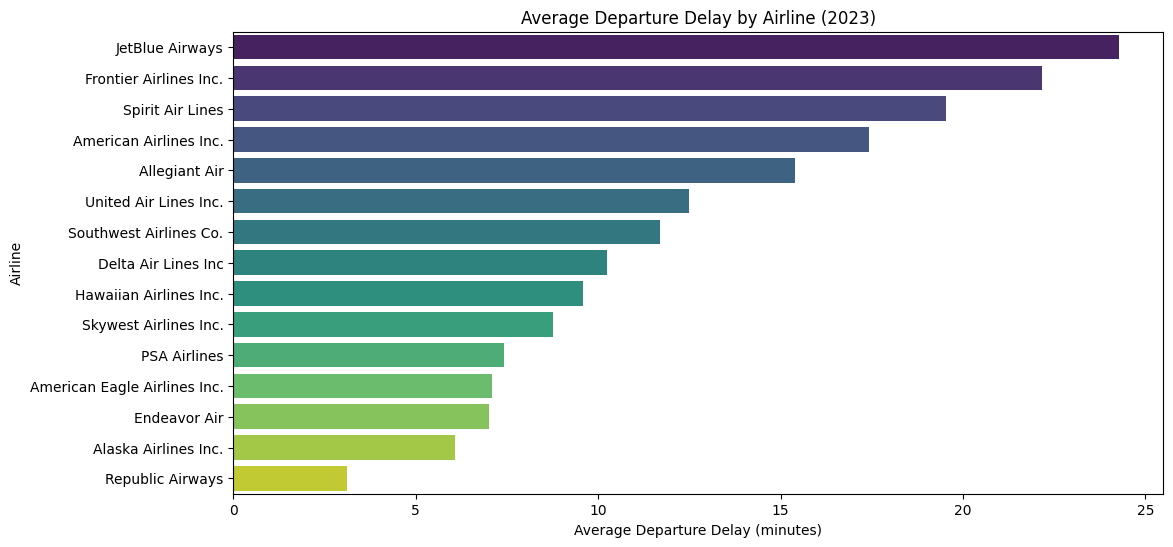

In [8]:
# Calculate average departure delay by airline
avg_dep_delay_by_airline = flights_df.groupby('Airline')['Dep_Delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_dep_delay_by_airline.values, y=avg_dep_delay_by_airline.index, palette='viridis')
plt.title('Average Departure Delay by Airline (2023)')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Airline')
plt.show()

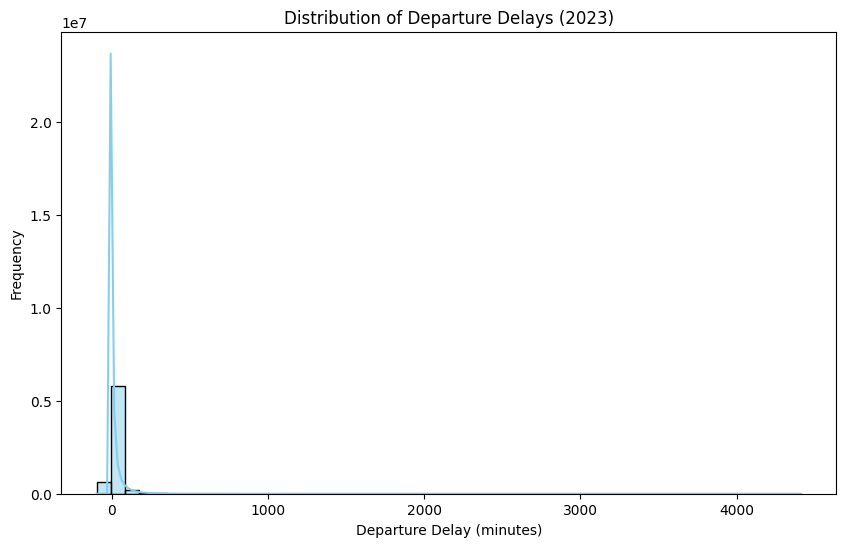

In [9]:
# Plot distribution of departure delays
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['Dep_Delay'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delays (2023)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

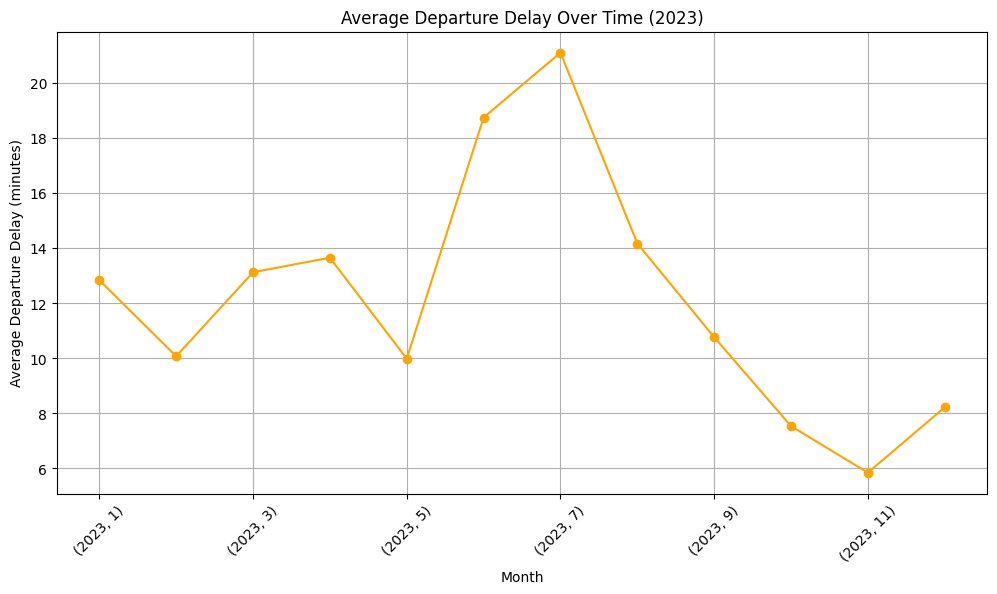

In [3]:
# Convert FlightDate to datetime
flights_df['FlightDate'] = pd.to_datetime(flights_df['FlightDate'])

# Extract month and year from FlightDate
flights_df['Month'] = flights_df['FlightDate'].dt.month
flights_df['Year'] = flights_df['FlightDate'].dt.year

# Calculate average departure delay by month
avg_delay_by_month = flights_df.groupby(['Year', 'Month'])['Dep_Delay'].mean()

# Plot
plt.figure(figsize=(12, 6))
avg_delay_by_month.plot(marker='o', color='orange')
plt.title('Average Departure Delay Over Time (2023)')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

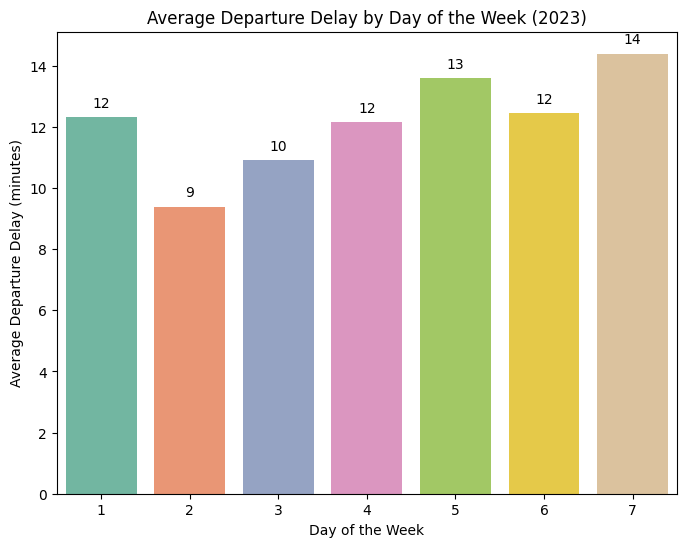

In [6]:
# Calculate average departure delay by day of the week
avg_delay_by_dayofweek = flights_df.groupby('Day_Of_Week')['Dep_Delay'].mean()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=avg_delay_by_dayofweek.index, y=avg_delay_by_dayofweek.values, palette='Set2')
plt.title('Average Departure Delay by Day of the Week (2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

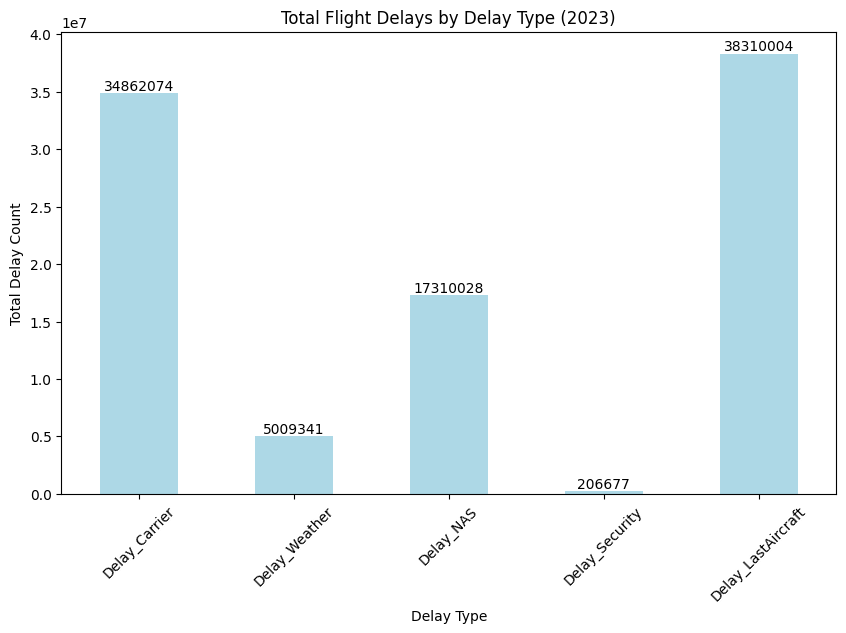

In [9]:
# Calculate total delay counts by delay type
delay_counts = flights_df[['Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft']].sum()

# Plot
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar', color='lightblue')
plt.title('Total Flight Delays by Delay Type (2023)')
plt.xlabel('Delay Type')
plt.ylabel('Total Delay Count')
plt.xticks(rotation=45)
for i, count in enumerate(delay_counts):
    plt.text(i, count, str(int(count)), ha='center', va='bottom')

plt.show()

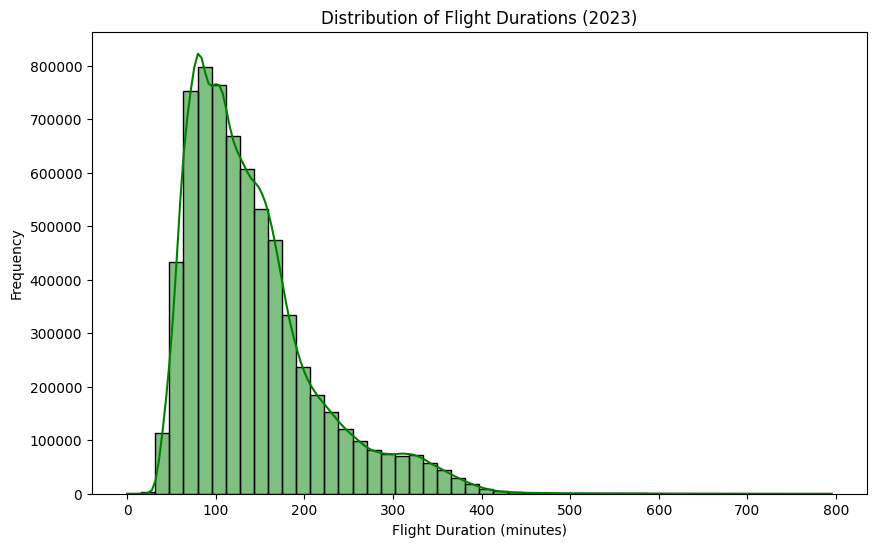

In [10]:
# Plot distribution of flight durations
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['Flight_Duration'], bins=50, kde=True, color='green')
plt.title('Distribution of Flight Durations (2023)')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

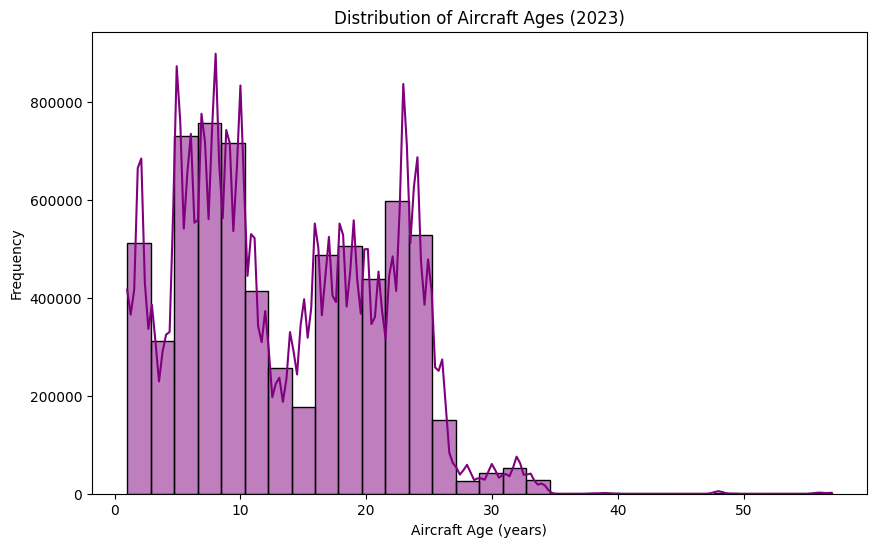

In [11]:
# Plot distribution of aircraft ages
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['Aicraft_age'], bins=30, kde=True, color='purple')
plt.title('Distribution of Aircraft Ages (2023)')
plt.xlabel('Aircraft Age (years)')
plt.ylabel('Frequency')
plt.show()

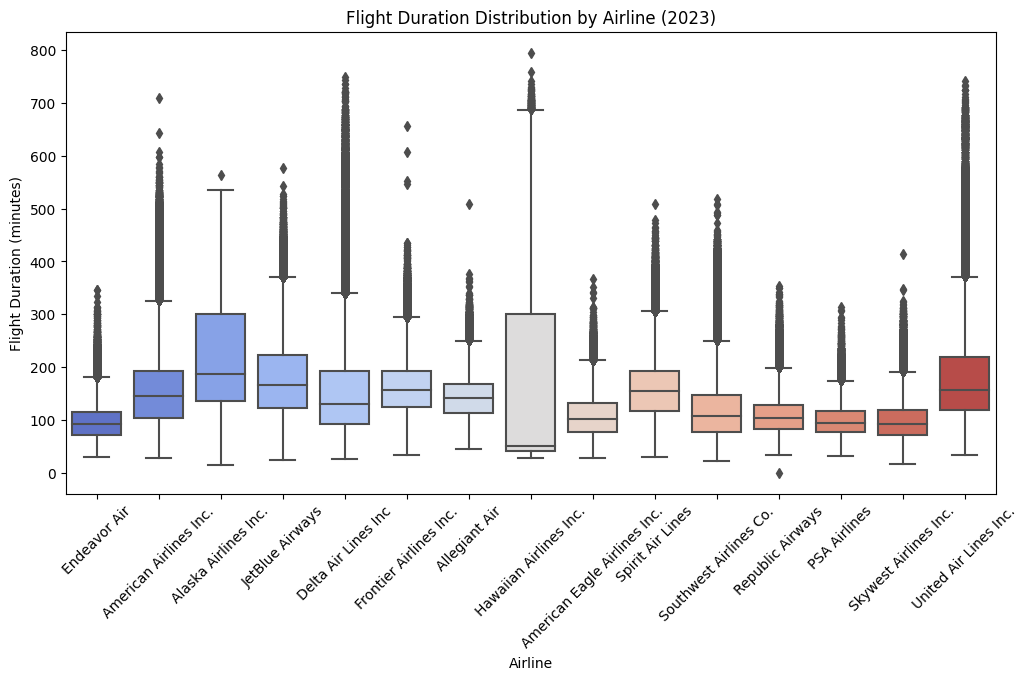

In [16]:
# Plot boxplot of flight duration distribution by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Flight_Duration', data=flights_df, palette='coolwarm')
plt.title('Flight Duration Distribution by Airline (2023)')
plt.xlabel('Airline')
plt.ylabel('Flight Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

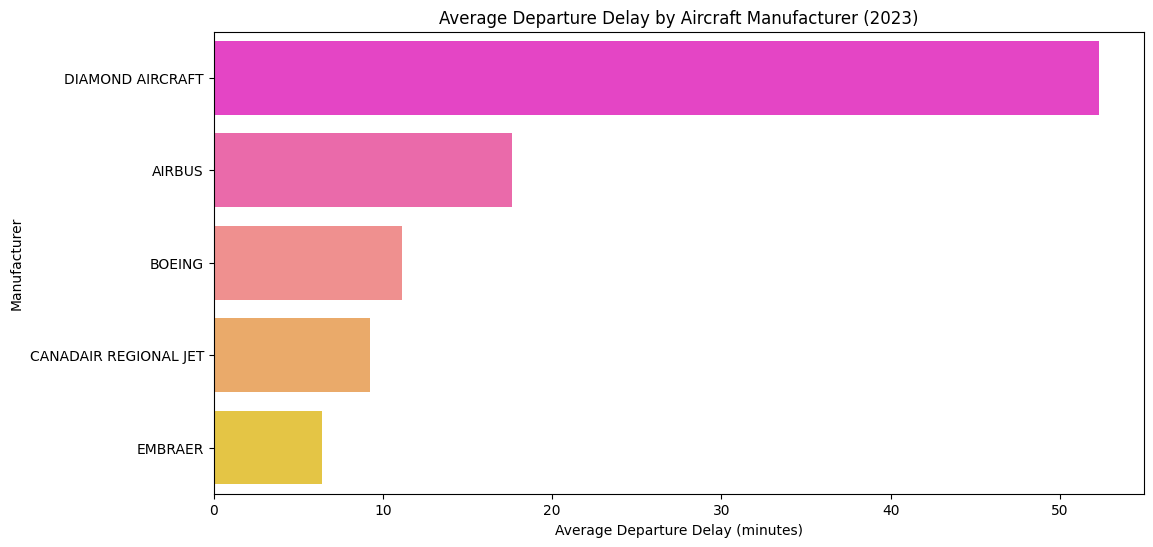

In [17]:
# Calculate average departure delay by aircraft manufacturer
avg_delay_by_manufacturer = flights_df.groupby('Manufacturer')['Dep_Delay'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_manufacturer.values, y=avg_delay_by_manufacturer.index, palette='spring')
plt.title('Average Departure Delay by Aircraft Manufacturer (2023)')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Manufacturer')
plt.show()

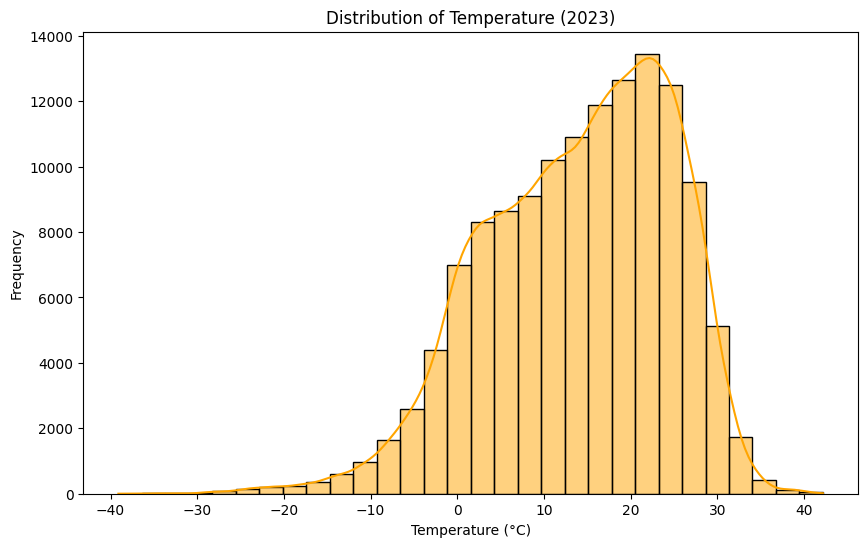

In [18]:
# Plot distribution of weather conditions (temperature)
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['tavg'], bins=30, kde=True, color='orange')
plt.title('Distribution of Temperature (2023)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()